In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm
%matplotlib inline
!pip install factor_analyzer
import statsmodels.graphics.factorplots

In [2]:
df=pd.read_csv('SalaryData.csv')

In [3]:
df.head(10)

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769
5,Doctorate,Sales,219420
6,Doctorate,Sales,237920
7,Doctorate,Sales,160540
8,Doctorate,Sales,180934
9,Doctorate,Prof-specialty,248156


In [4]:
df.describe()

,Salary
count,40.000000
mean,162186.875000
std,64860.407506
min,50103.000000
25%,99897.500000
50%,169100.000000
75%,214440.750000
max,260151.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [6]:
df.Education=pd.Categorical(df.Education)

In [7]:
df.Education.value_counts

<bound method IndexOpsMixin.value_counts of 0      Doctorate
1      Doctorate
2      Doctorate
3      Doctorate
4      Doctorate
5      Doctorate
6      Doctorate
7      Doctorate
8      Doctorate
9      Doctorate
10     Doctorate
11     Doctorate
12     Doctorate
13     Doctorate
14     Doctorate
15     Bachelors
16     Bachelors
17     Bachelors
18     Bachelors
19     Bachelors
20     Bachelors
21     Bachelors
22     Bachelors
23     Bachelors
24     Bachelors
25     Bachelors
26       HS-grad
27       HS-grad
28       HS-grad
29       HS-grad
30       HS-grad
31       HS-grad
32       HS-grad
33       HS-grad
34       HS-grad
35     Bachelors
36     Bachelors
37     Bachelors
38     Bachelors
39     Doctorate
Name: Education, dtype: category
Categories (3, object): [' Bachelors', ' Doctorate', ' HS-grad']>

In [8]:
df.Occupation=pd.Categorical(df.Occupation)

In [9]:
df.Occupation.value_counts

<bound method IndexOpsMixin.value_counts of 0         Adm-clerical
1         Adm-clerical
2         Adm-clerical
3         Adm-clerical
4                Sales
5                Sales
6                Sales
7                Sales
8                Sales
9       Prof-specialty
10      Prof-specialty
11      Prof-specialty
12      Prof-specialty
13      Prof-specialty
14      Prof-specialty
15        Adm-clerical
16        Adm-clerical
17        Adm-clerical
18      Prof-specialty
19      Prof-specialty
20      Prof-specialty
21      Prof-specialty
22               Sales
23               Sales
24               Sales
25               Sales
26               Sales
27               Sales
28               Sales
29        Adm-clerical
30        Adm-clerical
31        Adm-clerical
32      Prof-specialty
33      Prof-specialty
34      Prof-specialty
35     Exec-managerial
36     Exec-managerial
37     Exec-managerial
38     Exec-managerial
39     Exec-managerial
Name: Occupation, dtype: category
Ca

ANSWER-1A.1

## For Education-

H0: mu1=mu2=mu3

H1: mu1=mu2!=m3 (For atleast one pair, the population means are unequal)

## For Occupation-

H0: mu1=mu2=mu3=mu4

H1: mu1=mu2=mu3!=mu4 (For atleast one pair, the population means are unequal)

In [10]:
formula='Salary ~ C(Education)+C(Occupation)'
model=ols(formula,df).fit() #calculates sums of squares
aov_table=anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq          F        PR(>F)
C(Education)    2.0  1.026955e+11  5.134773e+10  31.257677  1.981539e-08
C(Occupation)   3.0  5.519946e+09  1.839982e+09   1.120080  3.545825e-01
Residual       34.0  5.585261e+10  1.642724e+09        NaN           NaN


ANSWER 1A.2-

H0 for Education is REJECTED as p_value is less than 0.05

ANSWER 1A.3- 

H0 for Occupation is NOT REJECTED as p_value is greater than 0.05

PROBLEM 1B.1

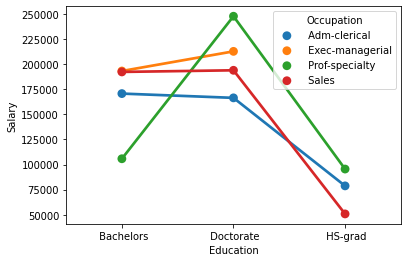

In [11]:
sns.pointplot(x='Education', y='Salary', data=df,hue='Occupation',ci=None)

In [12]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  


ANSWER 1B.2

H0: There is no interaction effect
H1: There is an interaction effect

Here p_value is less 

ANSWER 1B.3

By performing an ANOVA test we can see that Education is the major factor impacting the Salary across different Occupation. However ,while interaction between (Education: Occupation) there are few observations that both has a slight interaction corresponding with Salary. The interaction between (Education: Occupation) is slightly important. But, Education is the significant predictor of Salary.

In [13]:
df2=pd.read_csv('Education - Post 12th Standard.csv')

In [14]:
df2.head(10)

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Albertson College,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Albertus Magnus College,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Albion College,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,Albright College,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,Alderson-Broaddus College,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [15]:
df2.shape

(777, 18)

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [17]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


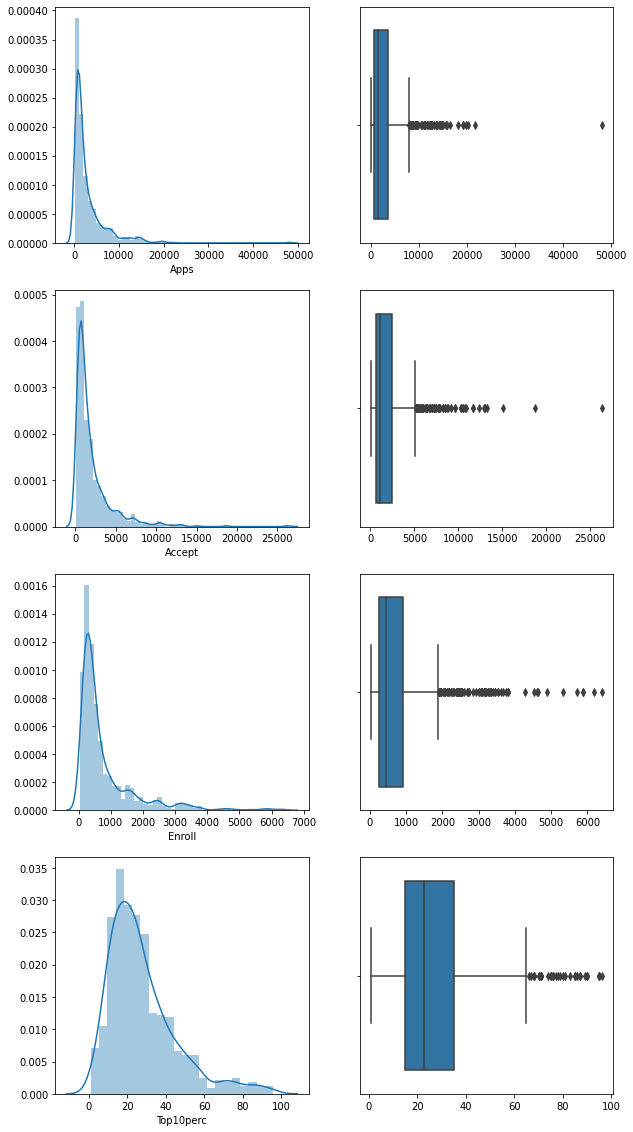

In [18]:
# Answer 2.1

fig,axes=plt.subplots(nrows= 4, ncols=2, figsize=(10,20))

sns.distplot(df2['Apps'],ax=axes[0][0])
sns.boxplot(x=['Apps'],data=df2,ax=axes[0][1])

sns.distplot(df2['Accept'],ax=axes[1][0])
sns.boxplot(x=['Accept'],data=df2,ax=axes[1][1])

sns.distplot(df2['Enroll'],ax=axes[2][0])
sns.boxplot(x=['Enroll'],data=df2,ax=axes[2][1])


sns.distplot(df2['Top10perc'],ax=axes[3][0])
sns.boxplot(x=['Top10perc'],data=df2,ax=axes[3][1])



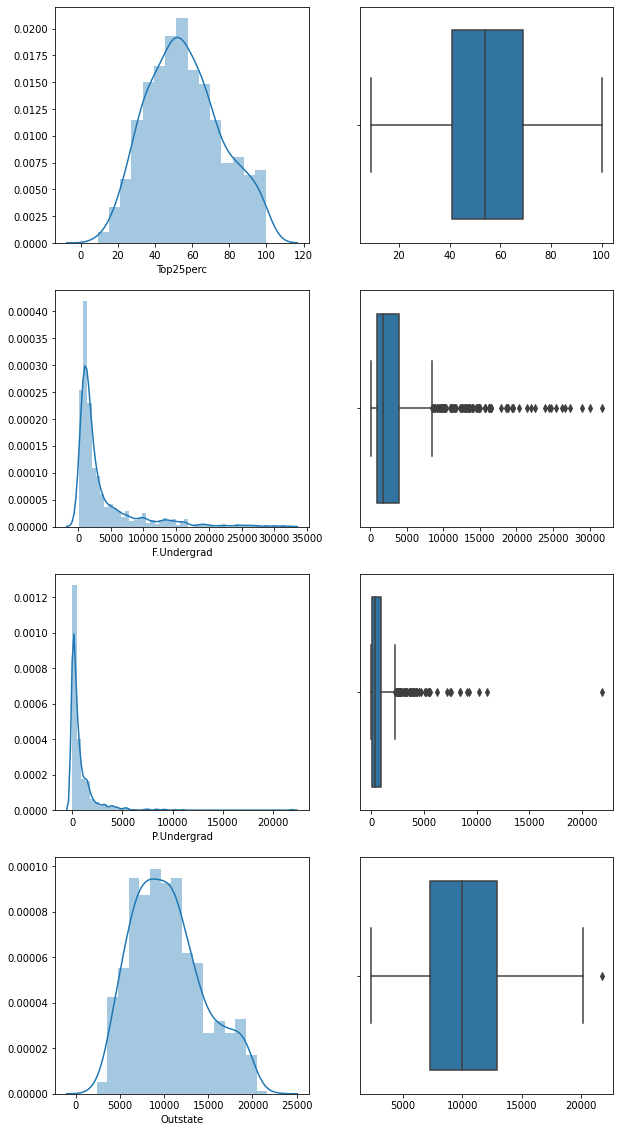

In [19]:
fig,axes=plt.subplots(nrows= 4, ncols=2, figsize=(10,20))

sns.distplot(df2['Top25perc'],ax=axes[0][0])
sns.boxplot(x=['Top25perc'],data=df2,ax=axes[0][1])


sns.distplot(df2['F.Undergrad'],ax=axes[1][0])
sns.boxplot(x=['F.Undergrad'],data=df2,ax=axes[1][1])

sns.distplot(df2['P.Undergrad'],ax=axes[2][0])
sns.boxplot(x=['P.Undergrad'],data=df2,ax=axes[2][1])

sns.distplot(df2['Outstate'],ax=axes[3][0])
sns.boxplot(x=['Outstate'],data=df2,ax=axes[3][1])


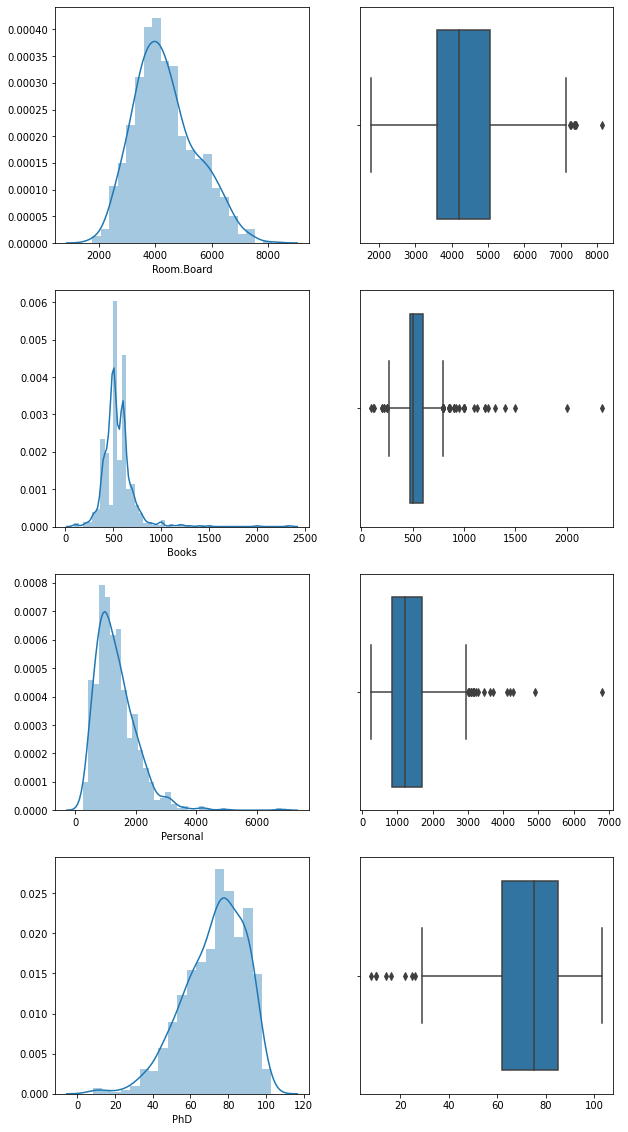

In [20]:
fig,axes=plt.subplots(nrows= 4, ncols=2, figsize=(10,20))

sns.distplot(df2['Room.Board'],ax=axes[0][0])
sns.boxplot(x=['Room.Board'],data=df2,ax=axes[0][1])


sns.distplot(df2['Books'],ax=axes[1][0])
sns.boxplot(x=['Books'],data=df2,ax=axes[1][1])

sns.distplot(df2['Personal'],ax=axes[2][0])
sns.boxplot(x=['Personal'],data=df2,ax=axes[2][1])

sns.distplot(df2['PhD'],ax=axes[3][0])
sns.boxplot(x=['PhD'],data=df2,ax=axes[3][1])

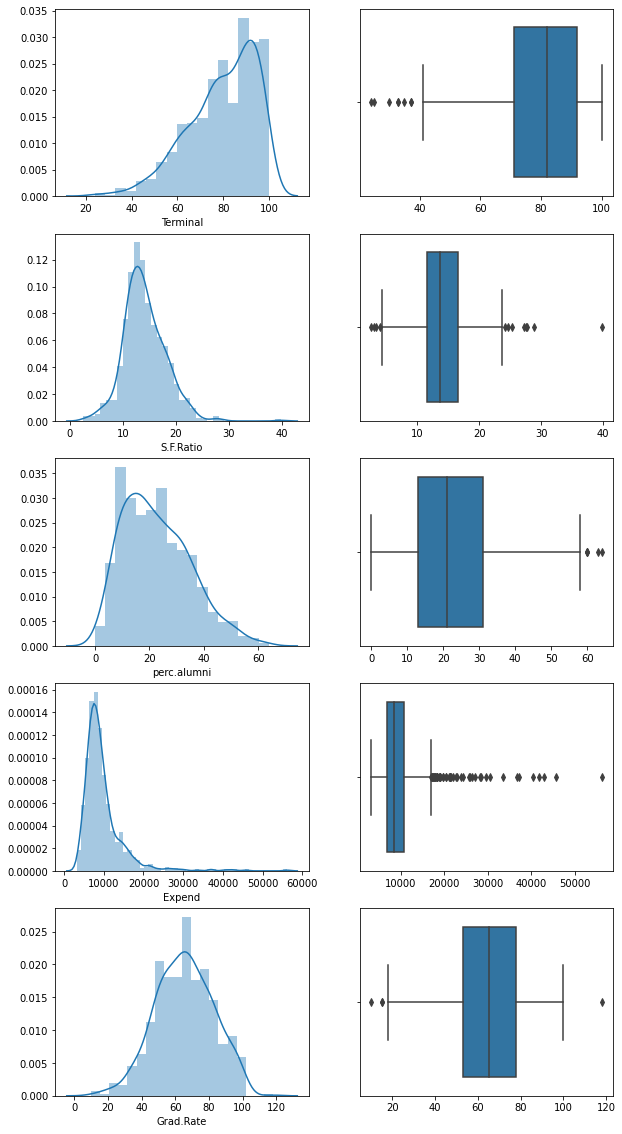

In [21]:
fig,axes=plt.subplots(nrows= 5, ncols=2, figsize=(10,20))

sns.distplot(df2['Terminal'],ax=axes[0][0])
sns.boxplot(x=['Terminal'],data=df2,ax=axes[0][1])


sns.distplot(df2['S.F.Ratio'],ax=axes[1][0])
sns.boxplot(x=['S.F.Ratio'],data=df2,ax=axes[1][1])

sns.distplot(df2['perc.alumni'],ax=axes[2][0])
sns.boxplot(x=['perc.alumni'],data=df2,ax=axes[2][1])

sns.distplot(df2['Expend'],ax=axes[3][0])
sns.boxplot(x=['Expend'],data=df2,ax=axes[3][1])

sns.distplot(df2['Grad.Rate'],ax=axes[4][0])
sns.boxplot(x=['Grad.Rate'],data=df2,ax=axes[4][1])

In [22]:
df2.skew(axis=0,skipna=True)

Apps           3.723750
Accept         3.417727
Enroll         2.690465
Top10perc      1.413217
Top25perc      0.259340
F.Undergrad    2.610458
P.Undergrad    5.692353
Outstate       0.509278
Room.Board     0.477356
Books          3.485025
Personal       1.742497
PhD           -0.768170
Terminal      -0.816542
S.F.Ratio      0.667435
perc.alumni    0.606891
Expend         3.459322
Grad.Rate     -0.113777
dtype: float64

In [23]:
#multivariate analysis

df2.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


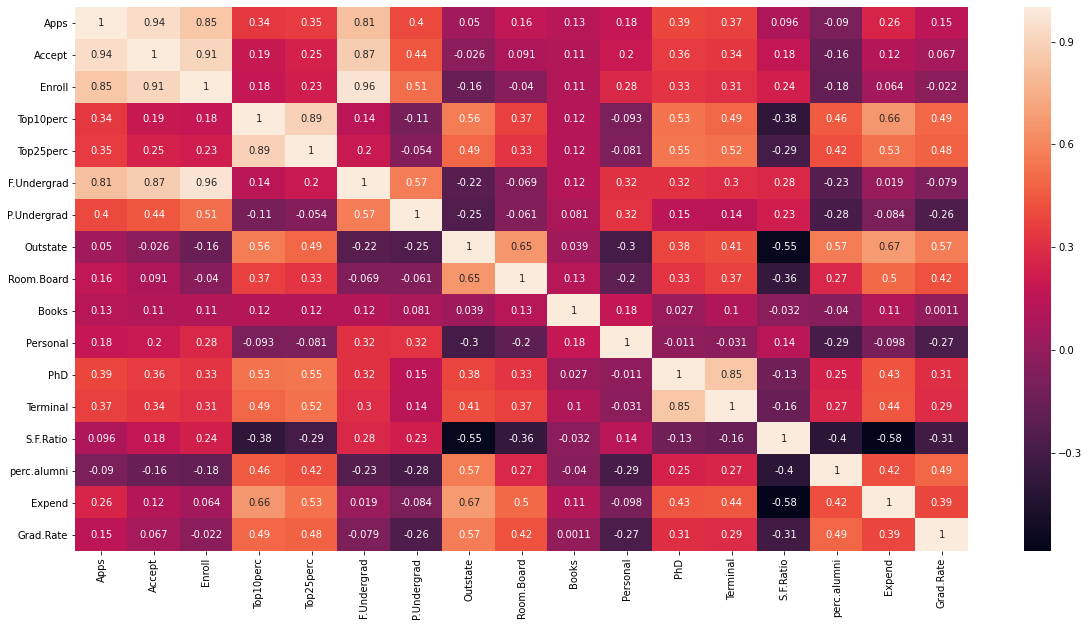

In [24]:
plt.subplots(figsize=(20,10))
sns.heatmap(df2.corr(),annot=True)

In [25]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3= np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [26]:
lrapps,urapps=remove_outlier(df2['Apps'])
df2['Apps']=np.where(df2['Apps']>urapps,urapps,df2['Apps'])
df2['Apps']=np.where(df2['Apps']<lrapps,lrapps,df2['Apps'])

lraccept,uraccept=remove_outlier(df2['Accept'])
df2['Accept']=np.where(df2['Accept']>uraccept,uraccept,df2['Accept'])
df2['Accept']=np.where(df2['Accept']<lraccept,lraccept,df2['Accept'])

lrenroll,urenroll=remove_outlier(df2['Enroll'])
df2['Enroll']=np.where(df2['Enroll']>urenroll,urenroll,df2['Enroll'])
df2['Enroll']=np.where(df2['Enroll']<lrenroll,lrenroll,df2['Enroll'])

lrtop10perc,urtop10perc=remove_outlier(df2['Top10perc'])
df2['Top10perc']=np.where(df2['Top10perc']>urtop10perc,urtop10perc,df2['Top10perc'])
df2['Top10perc']=np.where(df2['Top10perc']<lrtop10perc,lrtop10perc,df2['Top10perc'])

lrf_undergrad,urf_undergrad=remove_outlier(df2['F.Undergrad'])
df2['F.Undergrad']=np.where(df2['F.Undergrad']>urf_undergrad,urf_undergrad,df2['F.Undergrad'])
df2['F.Undergrad']=np.where(df2['F.Undergrad']<lrf_undergrad,lrf_undergrad,df2['F.Undergrad'])

lrp_undergrad,urp_undergrad=remove_outlier(df2['P.Undergrad'])
df2['P.Undergrad']=np.where(df2['P.Undergrad']>urp_undergrad,urp_undergrad,df2['P.Undergrad'])
df2['P.Undergrad']=np.where(df2['P.Undergrad']<lrp_undergrad,lrp_undergrad,df2['P.Undergrad'])

lroutstate,uroutstate=remove_outlier(df2['Outstate'])
df2['Outstate']=np.where(df2['Outstate']>uroutstate,uroutstate,df2['Outstate'])
df2['Outstate']=np.where(df2['Outstate']<lroutstate,lroutstate,df2['Outstate'])

lrroom_board,urroom_board=remove_outlier(df2['Room.Board'])
df2['Room.Board']=np.where(df2['Room.Board']>urroom_board,urroom_board,df2['Room.Board'])
df2['Room.Board']=np.where(df2['Room.Board']<lrroom_board,lrroom_board,df2['Room.Board'])

lrbooks,urbooks=remove_outlier(df2['Books'])
df2['Books']=np.where(df2['Books']>urbooks,urbooks,df2['Books'])
df2['Books']=np.where(df2['Books']<lrbooks,lrbooks,df2['Books'])

lrpersonal,urpersonal=remove_outlier(df2['Personal'])
df2['Personal']=np.where(df2['Personal']>urpersonal,urpersonal,df2['Personal'])
df2['Personal']=np.where(df2['Personal']<lrpersonal,lrpersonal,df2['Personal'])

lrphd,urphd=remove_outlier(df2['PhD'])
df2['PhD']=np.where(df2['PhD']>urphd,urphd,df2['PhD'])
df2['PhD']=np.where(df2['PhD']<lrphd,lrphd,df2['PhD'])

lrterminal,urterminal=remove_outlier(df2['Terminal'])
df2['Terminal']=np.where(df2['Terminal']>urterminal,urterminal,df2['Terminal'])
df2['Terminal']=np.where(df2['Terminal']<lrterminal,lrterminal,df2['Terminal'])

lrsfratio,ursfratio=remove_outlier(df2['S.F.Ratio'])
df2['S.F.Ratio']=np.where(df2['S.F.Ratio']>ursfratio,ursfratio,df2['S.F.Ratio'])
df2['S.F.Ratio']=np.where(df2['S.F.Ratio']<lrsfratio,lrsfratio,df2['S.F.Ratio'])

lrpercalumni,urpercalumni=remove_outlier(df2['perc.alumni'])
df2['perc.alumni']=np.where(df2['perc.alumni']>urpercalumni,urpercalumni,df2['perc.alumni'])
df2['perc.alumni']=np.where(df2['perc.alumni']<lrpercalumni,lrpercalumni,df2['perc.alumni'])

lrexpend,urexpend=remove_outlier(df2['Expend'])
df2['Expend']=np.where(df2['Expend']>urexpend,urexpend,df2['Expend'])
df2['Expend']=np.where(df2['Expend']<lrexpend,lrexpend,df2['Expend'])

lrgradrate,urgradrate=remove_outlier(df2['Grad.Rate'])
df2['Grad.Rate']=np.where(df2['Grad.Rate']>urgradrate,urgradrate,df2['Grad.Rate'])
df2['Grad.Rate']=np.where(df2['Grad.Rate']<lrgradrate,lrgradrate,df2['Grad.Rate'])

In [27]:
df2_new=df2.drop(['Names'], axis=1)
df2_new.head(10)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660.0,1232.0,721.0,23.0,52,2885.0,537.0,7440.0,3300.0,450.0,2200.0,70.0,78.0,18.1,12.0,7041.0,60.0
1,2186.0,1924.0,512.0,16.0,29,2683.0,1227.0,12280.0,6450.0,750.0,1500.0,29.0,39.5,12.2,16.0,10527.0,56.0
2,1428.0,1097.0,336.0,22.0,50,1036.0,99.0,11250.0,3750.0,400.0,1165.0,53.0,66.0,12.9,30.0,8735.0,54.0
3,417.0,349.0,137.0,60.0,89,510.0,63.0,12960.0,5450.0,450.0,875.0,92.0,97.0,7.7,37.0,16948.5,59.0
4,193.0,146.0,55.0,16.0,44,249.0,869.0,7560.0,4120.0,795.0,1500.0,76.0,72.0,11.9,2.0,10922.0,15.5
5,587.0,479.0,158.0,38.0,62,678.0,41.0,13500.0,3335.0,500.0,675.0,67.0,73.0,9.4,11.0,9727.0,55.0
6,353.0,340.0,103.0,17.0,45,416.0,230.0,13290.0,5720.0,500.0,1500.0,90.0,93.0,11.5,26.0,8861.0,63.0
7,1899.0,1720.0,489.0,37.0,68,1594.0,32.0,13868.0,4826.0,450.0,850.0,89.0,100.0,13.7,37.0,11487.0,73.0
8,1038.0,839.0,227.0,30.0,63,973.0,306.0,15595.0,4400.0,300.0,500.0,79.0,84.0,11.3,23.0,11644.0,80.0
9,582.0,498.0,172.0,21.0,44,799.0,78.0,10468.0,3380.0,660.0,1800.0,40.0,41.0,11.5,15.0,8991.0,52.0


ANSWER2.2

THE MAIN OBJECTIVE OF SCALING IS TO NORMALIZE A DATA WITHIN A PARTIRICULAR RANGE. IT IS A STEP OF DATA PRE PROCESSING WHICH IS APPLIED TO INDEPENDENT VARIABLES OR FEATURES OF DATA. ANOTHER IMPORTANCE OF SCALING IS THAT IT HELPS IN SPEEDING UP THE CALCULATIONS IN AN ALGORITHM

In [28]:
#Standardizing before PCA
from scipy.stats import zscore
df3=df2_new.apply(zscore)
df3.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.376493,-0.337830,0.106380,-0.246780,-0.191827,-0.018769,-0.166083,-0.746480,-0.968324,-0.776567,1.438500,-0.174045,-0.123239,1.070602,-0.870466,-0.630916,-0.319205
1,-0.159195,0.116744,-0.260441,-0.696290,-1.353911,-0.093626,0.797856,0.457762,1.921680,1.828605,0.289289,-2.745731,-2.785068,-0.489511,-0.545726,0.396097,-0.552693
2,-0.472336,-0.426511,-0.569343,-0.310996,-0.292878,-0.703966,-0.777974,0.201488,-0.555466,-1.210762,-0.260691,-1.240354,-0.952900,-0.304413,0.590864,-0.131845,-0.669437
3,-0.889994,-0.917871,-0.918613,2.129202,1.677612,-0.898889,-0.828267,0.626954,1.004218,-0.776567,-0.736792,1.205884,1.190391,-1.679429,1.159159,2.287940,-0.377577
4,-0.982532,-1.051221,-1.062533,-0.696290,-0.596031,-0.995610,0.297726,-0.716623,-0.216006,2.219381,0.289289,0.202299,-0.538069,-0.568839,-1.682316,0.512468,-2.916759


#ANSWER 2.3

Correlation is a sclaed version of covariance and the two parameters always have the same sign. When the sign is +ve, it is said to be positivelty correlated and when the sign is -ve, it is said to be negatively correlated.

Correlation measures both strength and direction of the linear relationship between two variables.

Covariance is used to determine how much two variables can change in tandem. It indicates the direction of the linear relationship between the variables

In [29]:
cov_matrix=np.cov(df3.T)
print(cov_matrix)


[[ 1.00128866e+00  9.56537704e-01  8.98039052e-01  3.21756324e-01
   3.64960691e-01  8.62111140e-01  5.20492952e-01  6.54209711e-02
   1.87717056e-01  2.36441941e-01  2.30243993e-01  4.64521757e-01
   4.35037784e-01  1.26573895e-01 -1.01288006e-01  2.43248206e-01
   1.50997775e-01]
 [ 9.56537704e-01  1.00128866e+00  9.36482483e-01  2.23586208e-01
   2.74033187e-01  8.98189799e-01  5.73428908e-01 -5.00874847e-03
   1.19740419e-01  2.08974091e-01  2.56676290e-01  4.27891234e-01
   4.03929238e-01  1.88748711e-01 -1.65728801e-01  1.62016688e-01
   7.90839722e-02]
 [ 8.98039052e-01  9.36482483e-01  1.00128866e+00  1.71977357e-01
   2.30730728e-01  9.68548601e-01  6.42421828e-01 -1.55856056e-01
  -2.38762560e-02  2.02317274e-01  3.39785395e-01  3.82031198e-01
   3.54835877e-01  2.74622251e-01 -2.23009677e-01  5.42906862e-02
  -2.32810071e-02]
 [ 3.21756324e-01  2.23586208e-01  1.71977357e-01  1.00128866e+00
   9.15052977e-01  1.11358019e-01 -1.80240778e-01  5.62884044e-01
   3.57826139e-01  

In [30]:
df3.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.955307,0.896883,0.321342,0.364491,0.861002,0.519823,0.065337,0.187475,0.236138,0.229948,0.463924,0.434478,0.126411,-0.101158,0.242935,0.150803
Accept,0.955307,1.000000,0.935277,0.223298,0.273681,0.897034,0.572691,-0.005002,0.119586,0.208705,0.256346,0.427341,0.403409,0.188506,-0.165516,0.161808,0.078982
Enroll,0.896883,0.935277,1.000000,0.171756,0.230434,0.967302,0.641595,-0.155655,-0.023846,0.202057,0.339348,0.381540,0.354379,0.274269,-0.222723,0.054221,-0.023251
Top10perc,0.321342,0.223298,0.171756,1.000000,0.913875,0.111215,-0.180009,0.562160,0.357366,0.153452,-0.116730,0.544048,0.506748,-0.387926,0.455797,0.657039,0.493670
Top25perc,0.364491,0.273681,0.230434,0.913875,1.000000,0.181196,-0.099295,0.489569,0.330987,0.169761,-0.086810,0.551461,0.527654,-0.297233,0.416832,0.572905,0.478985
F.Undergrad,0.861002,0.897034,0.967302,0.111215,0.181196,1.000000,0.696130,-0.226166,-0.054476,0.207879,0.359783,0.361564,0.335054,0.324504,-0.285457,0.000371,-0.082239
P.Undergrad,0.519823,0.572691,0.641595,-0.180009,-0.099295,0.696130,1.000000,-0.354216,-0.067638,0.122529,0.344053,0.127663,0.122152,0.370607,-0.419334,-0.201929,-0.265158
Outstate,0.065337,-0.005002,-0.155655,0.562160,0.489569,-0.226166,-0.354216,1.000000,0.655489,0.005110,-0.325609,0.391321,0.412579,-0.573683,0.565736,0.775328,0.572458
Room.Board,0.187475,0.119586,-0.023846,0.357366,0.330987,-0.054476,-0.067638,0.655489,1.000000,0.108924,-0.219554,0.341469,0.379270,-0.376430,0.272393,0.580622,0.425790
Books,0.236138,0.208705,0.202057,0.153452,0.169761,0.207879,0.122529,0.005110,0.108924,1.000000,0.239863,0.136390,0.159318,-0.008536,-0.042832,0.149983,-0.008051


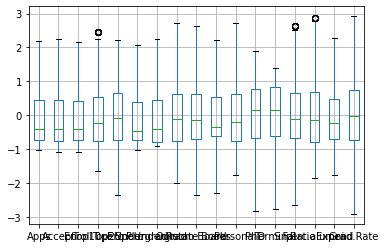

In [31]:
#ANSWER 2.4
# checking again FOR OUTLIERS

df3.boxplot()


In [32]:
#ANSWER 2.5
from sklearn.decomposition import PCA
pca=PCA(n_components=6,random_state=123)
df_pca=pca.fit_transform(df3)
df_pca.transpose()


array([[-1.60249937, -1.80467545, -1.60828257, ..., -0.57688267,
         6.570952  , -0.47739307],
       [ 0.99368301, -0.07041499, -1.38279212, ...,  0.01779846,
        -1.18493014,  1.04394672],
       [ 0.03004465,  2.12212761, -0.50151256, ...,  0.32216029,
         1.32596555, -1.42543841],
       [-1.0084224 ,  3.13894112, -0.03637346, ..., -0.58725874,
         0.07770712, -1.30027369],
       [-0.36688613,  2.4532118 ,  0.76599686, ...,  0.17522464,
         1.36851665,  0.72091766],
       [-0.69747568,  0.99485839, -1.02623664, ...,  0.50404285,
        -0.82274552,  1.05180977]])

In [33]:
#EIGENVECTOR

pca.components_

array([[ 2.62171542e-01,  2.30562461e-01,  1.89276397e-01,
         3.38874521e-01,  3.34690532e-01,  1.63293010e-01,
         2.24797091e-02,  2.83547285e-01,  2.44186588e-01,
         9.67082754e-02, -3.52299594e-02,  3.26410696e-01,
         3.23115980e-01, -1.63151642e-01,  1.86610828e-01,
         3.28955847e-01,  2.38822447e-01],
       [ 3.14136258e-01,  3.44623583e-01,  3.82813322e-01,
        -9.93191661e-02, -5.95055011e-02,  3.98636372e-01,
         3.57550046e-01, -2.51863617e-01, -1.31909124e-01,
         9.39739472e-02,  2.32439594e-01,  5.51390195e-02,
         4.30332048e-02,  2.59804556e-01, -2.57092552e-01,
        -1.60008951e-01, -1.67523664e-01],
       [-8.10177219e-02, -1.07658626e-01, -8.55297009e-02,
         7.88293852e-02,  5.07938244e-02, -7.37077719e-02,
        -4.03568707e-02, -1.49394787e-02,  2.11379162e-02,
         6.97121128e-01,  5.30972806e-01, -8.11134045e-02,
        -5.89785930e-02, -2.74150658e-01, -1.03715887e-01,
         1.84205686e-01, -2.4

In [34]:
#EIGENVALUES

pca.explained_variance_

array([5.6625219 , 4.89470815, 1.12636744, 1.00397659, 0.87218426,
       0.7657541 ])

In [35]:
#ANSWER 2.6

df_extracted_loadings=pd.DataFrame(pca.components_,columns=list(df3))
df_extracted_loadings                                  

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.262172,0.230562,0.189276,0.338875,0.334691,0.163293,0.022480,0.283547,0.244187,0.096708,-0.035230,0.326411,0.323116,-0.163152,0.186611,0.328956,0.238822
1,0.314136,0.344624,0.382813,-0.099319,-0.059506,0.398636,0.357550,-0.251864,-0.131909,0.093974,0.232440,0.055139,0.043033,0.259805,-0.257093,-0.160009,-0.167524
2,-0.081018,-0.107659,-0.085530,0.078829,0.050794,-0.073708,-0.040357,-0.014939,0.021138,0.697121,0.530973,-0.081113,-0.058979,-0.274151,-0.103716,0.184206,-0.245336
3,0.098776,0.118140,0.009307,-0.369115,-0.416824,0.013950,0.225351,0.262975,0.580894,-0.036156,-0.114983,-0.147261,-0.089008,-0.259486,-0.223982,0.213756,-0.036192
4,0.219898,0.189635,0.162315,0.157211,0.144449,0.102728,-0.095679,0.037275,-0.069108,0.035406,-0.000475,-0.550787,-0.590407,-0.142843,0.128216,-0.022424,0.356843
5,0.002188,-0.016521,-0.068079,-0.088866,-0.027627,-0.051647,-0.024538,-0.020386,0.237267,0.638605,-0.381496,0.003344,0.035412,0.468753,0.012567,-0.231562,0.313556


In [36]:
#ANSWER 2.8

np.cumsum(pca.explained_variance_ratio_)

array([0.33266084, 0.62021429, 0.68638592, 0.74536736, 0.79660629,
       0.84159268])

#ANSWER 2.9
PCA is a statistical technique and uses orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables. PCA tool also helps reduce multidimensional data to lower dimensions while retaining most of the information. 

This PCA can also be done on continuous variables

There are 18 variables in the data set, by applying PCA we will reduce those to just 7 components which will capture 87.6% variance in the dataset.